In [1]:
grammar = """
sentence = adj noun verb noun2
adj = adj_single adj_single 的 | adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 激动地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 | 钢琴
"""

In [2]:
"   1 2 3".split() 

['1', '2', '3']

In [3]:
def my_build_grammar(grammar_str, split = "="):
    grammar_rule = {}
    for each_line in grammar_str.split("\n"):
        if not each_line.split(): continue
        key, rules = each_line.split(split)
        rules = [rule.split() for rule in rules.split("|")]
        grammar_rule[key.strip()] = rules
    return grammar_rule
my_build_grammar(grammar)

{'sentence': [['adj', 'noun', 'verb', 'noun2']],
 'adj': [['adj_single', 'adj_single', '的'], ['adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['激动地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球'], ['钢琴']]}

In [4]:
def build_grammar(grammar_str, split = "="):
    grammar_rule = {}
    for sentence in grammar_str.split("\n"):
        if not sentence:   continue
        state, expr = sentence.split(split)
        grammar_rule[state.strip()] = [e.split() for e in expr.split("|")]
    return grammar_rule
build_grammar(grammar)

{'sentence': [['adj', 'noun', 'verb', 'noun2']],
 'adj': [['adj_single', 'adj_single', '的'], ['adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['激动地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球'], ['钢琴']]}

In [5]:
import random
def my_generate(grammar_rules, start):
    if not start in grammar_rules: return start
    get_rule = random.choice(grammar_rules[start])
    tokens = [my_generate(grammar_rules, e) for e in get_rule if e != 'null']
    return "".join(tokens)
my_generate(build_grammar(grammar, "="), "verb")

'激动地看着'

In [6]:
import random
def generate(grammar_rule, target):
    if not target in grammar_rule:   return target
    expr = random.choice(grammar_rule[target])
    token = [generate(grammar_rule, e) for e in expr if e != 'null']
    return "".join(token)

In [7]:
generate(build_grammar(grammar), "verb")

'安静地坐着'

# DFS, BFS

In [8]:
A = "A"
B = "B"
C = "C"
D = "D"
E = "E"
graph = {
    A : [B, B, C],
    B : [A, C, D], 
    C : [A, B, D, E], 
    D : [B, C],
    E : [C]
}

In [9]:
for key, item in graph.items():
    graph[key] = set(item)
graph

{'A': {'B', 'C'},
 'B': {'A', 'C', 'D'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'B', 'C'},
 'E': {'C'}}

In [10]:
import networkx
graph_display = networkx.Graph(graph)
%matplotlib inline

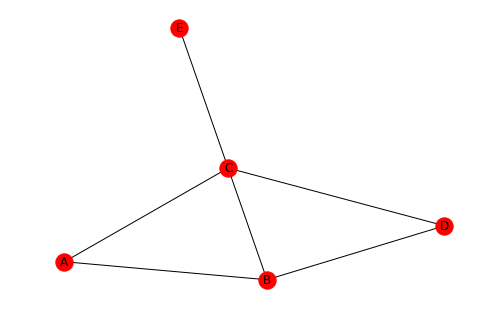

In [11]:
networkx.draw(graph_display, with_labels = True)

In [12]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C', 'D'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'B', 'C'},
 'E': {'C'}}

In [13]:
#DFS search
to_visit = ["A"]
seen = set([])
while to_visit:
    node = to_visit.pop(0)
    if node in seen: continue
    seen.add(node)
    print("I'm looking at {}".format(node))
    to_visit += graph[node]

I'm looking at A
I'm looking at C
I'm looking at B
I'm looking at D
I'm looking at E


In [14]:
def search(graph, start, concat_fun):
    to_visit = [start]
    seen = set([])
    while to_visit:
        node = to_visit.pop(0)
        if node in seen: continue
        seen.add(node)
        print("I'm looking at {}".format(node))
        to_visit = concat_fun(to_visit, graph[node])
def new_discovered_important(to_visit, new_ones):
    return new_ones + to_visit
def old_important(to_visit, new_ones):
    return to_visit + new_ones

In [15]:
graph1 = {
    "1":"2 7",
    "2":"3",
    "3":"4",
    "4":"5",
    "5":"6",
    "6":"5",
    "7":"1 8",
    "8":"9",
    "9":"10",
    "10":"9"
}
for key, item in graph1.items():
    graph1[key] = item.split()

In [16]:
#DFS
search(graph1, "1", new_discovered_important)

I'm looking at 1
I'm looking at 2
I'm looking at 3
I'm looking at 4
I'm looking at 5
I'm looking at 6
I'm looking at 7
I'm looking at 8
I'm looking at 9
I'm looking at 10


In [17]:
#BFS
search(graph1, "1", old_important)

I'm looking at 1
I'm looking at 2
I'm looking at 7
I'm looking at 3
I'm looking at 8
I'm looking at 4
I'm looking at 9
I'm looking at 5
I'm looking at 10
I'm looking at 6


In [18]:
from functools import partial
dfs = partial(search, start = "1", concat_fun = new_discovered_important)
bfs = partial(search, start = "1", concat_fun = old_important)

In [19]:
dfs(graph1)

I'm looking at 1
I'm looking at 2
I'm looking at 3
I'm looking at 4
I'm looking at 5
I'm looking at 6
I'm looking at 7
I'm looking at 8
I'm looking at 9
I'm looking at 10


In [20]:
bfs(graph1)

I'm looking at 1
I'm looking at 2
I'm looking at 7
I'm looking at 3
I'm looking at 8
I'm looking at 4
I'm looking at 9
I'm looking at 5
I'm looking at 10
I'm looking at 6


# MAPPING

In [21]:
#cities
new_york = "New York"
beijing = "Beijing"
new_orleans = "New Orleans"
washington = "Washington"
madrid = "Madrid"
paris = "Paris"
boston = "Boston"
barcelona = "Barcelona"
lisbon = "Lisbon"
la = "Los Angeles"

In [74]:
line = {
    new_york : {beijing, new_orleans, washington, la, boston, madrid, lisbon},
    beijing : {new_york, la, madrid, washington},
    new_orleans : {new_york},
    washington : {new_york, beijing},
    madrid : {new_york, barcelona, paris, lisbon, beijing},
    paris : {madrid, barcelona, la, lisbon},
    boston : {new_york, lisbon},
    barcelona : {madrid, paris},
    lisbon : {madrid, new_york, paris, boston},
    la : {paris, beijing, new_york}
}

In [75]:
airline = networkx.Graph(line)

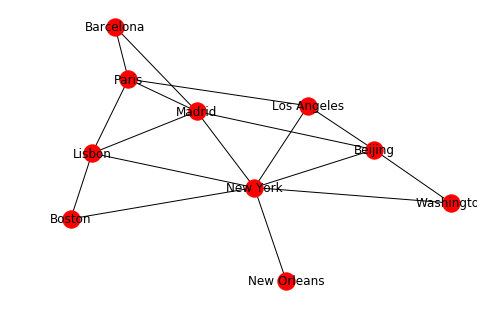

In [76]:
%matplotlib inline
networkx.draw(airline, with_labels=True)

In [77]:
def my_search_destination(start, end, airline):
    path, to_visit = [], [start]
    seen = set()
    while to_visit:
        curr_city = to_visit.pop(0)
        if curr_city in seen: continue
        path.append(curr_city)
        seen.add(curr_city)
        if curr_city == end:
            break
        to_visit = to_visit + list(airline[curr_city])
    return " -> ".join(path)
my_search_destination(la, lisbon, line)

'Los Angeles -> Beijing -> New York -> Paris -> Madrid -> Washington -> Lisbon'

In [78]:
def search_destination(start, end, airline):
    result, to_visit = [], [start]
    visited = set([])
    while to_visit:
        current_city = to_visit.pop(0)
        if current_city in visited: continue
        visited.add(current_city)
        result.append(current_city)
        if current_city == end:
            break
        to_visit = list(airline[current_city]) + to_visit
    return " -> ".join(result)

In [79]:
search_destination(la, lisbon, line)

'Los Angeles -> Beijing -> Madrid -> Lisbon'

In [80]:
def search_destination_shortest(start, end, airline):
    if start == end:
        return "No need to Travel!"
    pathes = [[start]]
    shortest_path, shortest_len = [], 1000
    visited = set()
    while pathes:
        path = pathes.pop(0)
        current_city = path[-1]
        if current_city in visited: continue
        if not current_city is end:
            visited.add(current_city)
            for new_city in airline[current_city]:
                #print(new_city)
                new_path = path + [new_city]
                pathes.append(new_path)
        else:
            shortest_len = min(shortest_len, len(path))
            #if shortest_len < len(path): break
            shortest_path.append(path)
    return shortest_path

In [81]:
search_destination_shortest(la, lisbon, line)
#print(airline)

[['Los Angeles', 'New York', 'Lisbon'],
 ['Los Angeles', 'Paris', 'Lisbon'],
 ['Los Angeles', 'Beijing', 'Madrid', 'Lisbon'],
 ['Los Angeles', 'New York', 'Boston', 'Lisbon']]